# Leena Sherif  
#### Last Updated: 03/21/2019  
#### Purpose: To use the adult.data set from UCI online and predict what varaibles are allowing certain individuals 
#### to make more or less than $50,000 USD annually.

# Abstract

- Preprocess and prepare data to feed into a machine learning classification algorithm.  

- Evaluate your classifier against the most commonly used classification metrics.  

- Optimize the parameters of a machine learning classifier.  

- Plot confusion matrix and ROC curve.

# Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

# Data Set Information 

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))Prediction task is to determine whether a person makes over 50K a year.  

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income

# Variables/Content

Listing of attributes:

>50K,<=50K.  

**age:**continuous.  **workclass:**Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  **fnlw**continuous.  **education:**Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,Doctorate, 5th-6th, Preschool.  **education-num:**continuous.**marital-status:**Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.**occupation:**Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.**relationship:**Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.**race:**White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.**sex:**Female, Male.**capital-gain:**continuous.**capital-loss:**continuous.**hours-per-week:**continuous.**native-country:**United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**NOTE**:   
**Capital gains = ** income from investment sources, apart from wages/salary  
**Capital loss =** losses from investment sources, apart from wages/salary  
** Fnlwgt = ** sampling weight

# Lets start!

### Importing libraries

In [382]:
# Import data analysis modules
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [346]:
# importing the dataset

In [383]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)

In [384]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [385]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'martial_status', 'occupation','relationship','race','sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [386]:
df.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [351]:
df['race'].value_counts

<bound method IndexOpsMixin.value_counts of 0                      White
1                      White
2                      White
3                      Black
4                      Black
5                      White
6                      Black
7                      White
8                      White
9                      White
10                     Black
11        Asian-Pac-Islander
12                     White
13                     Black
14        Asian-Pac-Islander
15        Amer-Indian-Eskimo
16                     White
17                     White
18                     White
19                     White
20                     White
21                     Black
22                     Black
23                     White
24                     White
25                     White
26                     White
27        Asian-Pac-Islander
28                     White
29                     White
30                     White
31                     Black
32                     White

In [367]:
df.shape

(32561, 15)

In [368]:
pd.options.display.max_rows=1000

In [369]:
df['race'].value_counts

<bound method IndexOpsMixin.value_counts of 0                      White
1                      White
2                      White
3                      Black
4                      Black
5                      White
6                      Black
7                      White
8                      White
9                      White
10                     Black
11        Asian-Pac-Islander
12                     White
13                     Black
14        Asian-Pac-Islander
15        Amer-Indian-Eskimo
16                     White
17                     White
18                     White
19                     White
20                     White
21                     Black
22                     Black
23                     White
24                     White
25                     White
26                     White
27        Asian-Pac-Islander
28                     White
29                     White
30                     White
31                     Black
32                     White

In [370]:
# we do not have any missing data
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
martial_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

In [371]:
df

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [357]:
df.apply(lambda x: x.count(), axis=1)

0        15
1        15
2        15
3        15
4        15
5        15
6        15
7        15
8        15
9        15
10       15
11       15
12       15
13       15
14       15
15       15
16       15
17       15
18       15
19       15
20       15
21       15
22       15
23       15
24       15
25       15
26       15
27       15
28       15
29       15
30       15
31       15
32       15
33       15
34       15
35       15
36       15
37       15
38       15
39       15
40       15
41       15
42       15
43       15
44       15
45       15
46       15
47       15
48       15
49       15
50       15
51       15
52       15
53       15
54       15
55       15
56       15
57       15
58       15
59       15
60       15
61       15
62       15
63       15
64       15
65       15
66       15
67       15
68       15
69       15
70       15
71       15
72       15
73       15
74       15
75       15
76       15
77       15
78       15
79       15
80       15
81       15
82       15
83  

### Trying out different ways to remove the '?' from our rows

In [498]:
df1

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,us_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,True
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,True
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,True
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,True
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,True
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K,True


In [499]:
df1 = df[df.us_country == True]

AttributeError: 'DataFrame' object has no attribute 'us_country'

In [ ]:
df1.head()

In [ ]:
df.dtypes

In [ ]:
df1.head(2
       )

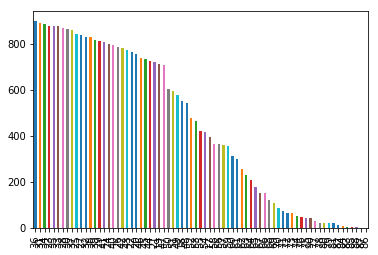

In [387]:
df['age'].value_counts().plot(kind='bar')


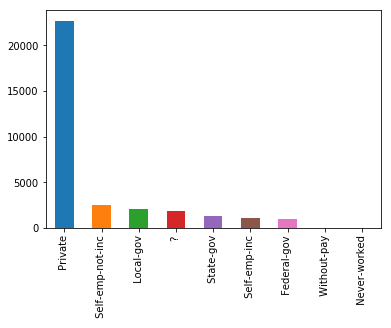

In [388]:
df['workclass'].value_counts().plot(kind='bar')


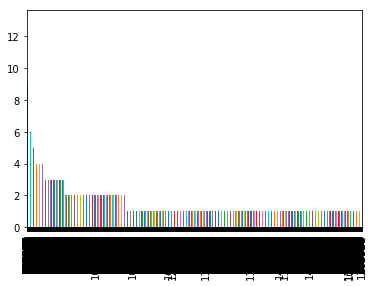

In [389]:
df['fnlwgt'].value_counts().plot(kind='bar')


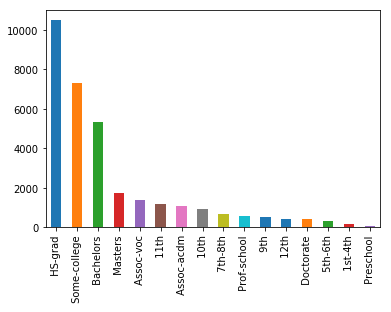

In [390]:
df['education'].value_counts().plot(kind='bar')

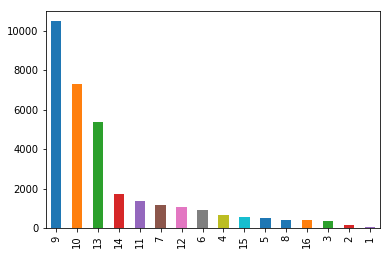

In [391]:
df['education_num'].value_counts().plot(kind='bar')

In [392]:
df1.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,us_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,True


In [ ]:
# I can drop the 

In [394]:
# drop the unneceesary data 
df2 = df1.drop(['us_country'], axis=1)

In [395]:
df2

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


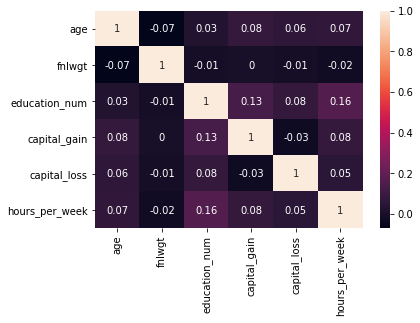

In [396]:
correlation_matrix = df2.corr().round(2)
correlation_matrix
sns.heatmap(data = correlation_matrix, annot = True)

### Now we are ready to get into Machiene Learning!

In [ ]:
# gender and country.

In [397]:
X = df2[['age', 'education_num', 'hours_per_week']]
y = df2['income']

In [398]:
X.head()

,age,education_num,hours_per_week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
5,37,14,40


In [399]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
5     <=50K
Name: income, dtype: object

In [400]:
from sklearn.preprocessing import LabelEncoder

In [401]:
encoder = LabelEncoder()

In [402]:
y_numeric = encoder.fit_transform(y)

In [403]:
y_numeric

array([0, 0, 0, ..., 0, 0, 1])

In [404]:
print(y_numeric[0:5])

[0 0 0 0 0]


In [405]:
encoder.classes_

array([' <=50K', ' >50K'], dtype=object)

### Split the data set into traniging and test sets



In [406]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size = 0.2, random_state = 42)

In [407]:
print(X_train[0:3])

       age  education_num  hours_per_week
9419    35             13              32
4608    43              9              40
21444   32              9              40


In [408]:
print(y_train[0:3])

[0 0 0]


In [409]:
print(y_test[0:3])

[0 0 0]


###### Basically if you have a 0 then it means you less than or equal to 50k. so you are making less than or equal to 50k.

##### 1 you are making more than 50k

# Logistic Regression

##### Import necesary Library

In [410]:
from sklearn.linear_model import LogisticRegression

##### 1. Initialize

In [411]:
logmodel = LogisticRegression()

##### 2. Fit the data

In [412]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### 3. Predictions

In [413]:
predictions = logmodel.predict(X_test)

In [414]:
print(predictions[0:10])

[0 0 0 1 0 0 1 1 1 0]


In [415]:
print(X_test[0:3])

       age  education_num  hours_per_week
32301   65              4              40
22138   23              9              40
12653   23             10              45


In [416]:
print(y_test[0:3])

[0 0 0]


 It is not the same which means that our machiene learning is not really that accurate

##### 4. Check accuracy score of the model

In [417]:
from sklearn.metrics import accuracy_score

In [418]:
accuracy_score(y_test, predictions)

0.786767226602674

In [428]:
print(logmodel.predict([[2,2,2])

SyntaxError: invalid syntax (<ipython-input-428-aceb285406fa>, line 1)

### Turns out the Logistic Regression is not so good. But maybe we just need to add more Variables?

In [429]:
df2.shape

(29170, 15)

In [430]:
df2.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


** Notes **

- We now want to understand why we have question marks in our data. We see that we only have data in our occupation
and work class.

*** These might be some of the reasons ** 

1. less than 16 and over 65 - counted as not part of the labor force
3. other = illegal activity, self employed, retiered, student


##### Identifying the coloumns that have '?'

## Lets check our value counts for each ** categorial **coloumn

###### here we can tell that **workclass** and **occupation** actually do have the '?'

#### 1. workclass

In [432]:
# we have a'?'
df2['workclass'].value_counts()

 Private             20135
 Self-emp-not-inc     2313
 Local-gov            1956
 ?                    1659
 State-gov            1210
 Self-emp-inc          991
 Federal-gov           886
 Without-pay            13
 Never-worked            7
Name: workclass, dtype: int64

#### 2. Martial status

In [433]:
df2['martial_status'].value_counts()

 Married-civ-spouse       13368
 Never-married             9579
 Divorced                  4162
 Widowed                    902
 Separated                  883
 Married-spouse-absent      253
 Married-AF-spouse           23
Name: martial_status, dtype: int64

#### 3. occupation

In [434]:
# we have a'?'
df2['occupation'].value_counts()

 Exec-managerial      3735
 Prof-specialty       3693
 Craft-repair         3685
 Adm-clerical         3449
 Sales                3364
 Other-service        2777
 Machine-op-inspct    1687
 ?                    1666
 Transport-moving     1491
 Handlers-cleaners    1189
 Farming-fishing       879
 Tech-support          850
 Protective-serv       606
 Priv-house-serv        90
 Armed-Forces            9
Name: occupation, dtype: int64

#### 4. relationship

In [435]:
df2['relationship'].value_counts()

 Husband           11861
 Not-in-family      7528
 Own-child          4691
 Unmarried          3033
 Wife               1361
 Other-relative      696
Name: relationship, dtype: int64

#### 5. race

In [436]:
df2['race'].value_counts()

 White                 25621
 Black                  2832
 Amer-Indian-Eskimo      296
 Asian-Pac-Islander      292
 Other                   129
Name: race, dtype: int64

# Encoding

#### Changing the values to category first then a numerical value.

#### 1. Workclass

In [437]:
df2["workclass"] = df2["workclass"].astype('category')
df2.dtypes

age                  int64
workclass         category
fnlwgt               int64
education           object
education_num        int64
martial_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income              object
dtype: object

In [ ]:
df2["workclass_cat"] = df2["workclass"].cat.codes
df2.head()

#### 2. Martial status

In [438]:
df2["martial_status"] = df2["martial_status"].astype('category')
df2.dtypes

age                  int64
workclass         category
fnlwgt               int64
education           object
education_num        int64
martial_status    category
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income              object
dtype: object

In [ ]:
df2["martial_status_cat"] = df2["martial_status"].cat.codes
df2.head()

#### 3. occupation

In [439]:
df2["occupation"] = df2["occupation"].astype('category')
df2.dtypes

age                  int64
workclass         category
fnlwgt               int64
education           object
education_num        int64
martial_status    category
occupation        category
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income              object
dtype: object

In [440]:
df2["occuption_cat"] = df2["occupation"].cat.codes
df2.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,occuption_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,6
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,6
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,4


#### 4. relationship

In [441]:
df2["relationship"] = df2["relationship"].astype('category')
df2.dtypes

age                  int64
workclass         category
fnlwgt               int64
education           object
education_num        int64
martial_status    category
occupation        category
relationship      category
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income              object
occuption_cat         int8
dtype: object

In [442]:
df2["relationship_cat"] = df2["relationship"].cat.codes
df2.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,occuption_cat,relationship_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,6,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,6,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,4,5


#### 5. race

In [443]:
df2["race"] = df2["race"].astype('category')
df2.dtypes

age                    int64
workclass           category
fnlwgt                 int64
education             object
education_num          int64
martial_status      category
occupation          category
relationship        category
race                category
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
income                object
occuption_cat           int8
relationship_cat        int8
dtype: object

In [444]:
df2["race_cat"] = df2["race"].cat.codes
df2.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,occuption_cat,relationship_cat,race_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,1,4
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4,0,4
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,6,1,4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,6,0,2
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,4,5,4


##### 6. sex

In [445]:
df2["sex"] = df2["sex"].astype('category')
df2.dtypes

age                    int64
workclass           category
fnlwgt                 int64
education             object
education_num          int64
martial_status      category
occupation          category
relationship        category
race                category
sex                 category
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
income                object
occuption_cat           int8
relationship_cat        int8
race_cat                int8
dtype: object

In [446]:
df2["sex_cat"] = df2["sex"].cat.codes
df2.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,occuption_cat,relationship_cat,race_cat,sex_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,1,4,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4,0,4,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,6,1,4,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,6,0,2,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,4,5,4,0


#### Drop all the other values and create a copy of the new dataset

In [447]:
df3 = df2.drop(['workclass','education', 'martial_status', 'occupation', 'relationship', 'race', 'sex' ], axis=1)

In [448]:
df3

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,income,occuption_cat,relationship_cat,race_cat,sex_cat
0,39,77516,13,2174,0,40,United-States,<=50K,1,1,4,1
1,50,83311,13,0,0,13,United-States,<=50K,4,0,4,1
2,38,215646,9,0,0,40,United-States,<=50K,6,1,4,1
3,53,234721,7,0,0,40,United-States,<=50K,6,0,2,1
5,37,284582,14,0,0,40,United-States,<=50K,4,5,4,0
7,52,209642,9,0,0,45,United-States,>50K,4,0,4,1
8,31,45781,14,14084,0,50,United-States,>50K,10,1,4,0
9,42,159449,13,5178,0,40,United-States,>50K,4,0,4,1
10,37,280464,10,0,0,80,United-States,>50K,4,0,2,1
12,23,122272,13,0,0,30,United-States,<=50K,1,3,4,0


## Lets do more machiene learning models

** Note ** 
- we already did Logistic regression and we saw that we got an accuracy score of 78%. but maybe thats becuse only added 
3 variables so lets do it again and add more!

#### But before we start we need to retrain our X and Y

In [449]:
df3.head(1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,income,occuption_cat,relationship_cat,race_cat,sex_cat
0,39,77516,13,2174,0,40,United-States,<=50K,1,1,4,1


## Classification

In [452]:
X = df3[['education_num', 'workclass_cat', 'martial_status_cat', 'occuption_cat', 'relationship_cat', 'race_cat', 'sex_cat']]

KeyError: "['workclass_cat' 'martial_status_cat'] not in index"

In [453]:
y = df3[['income']]

In [454]:
X.head()

,age,education_num,hours_per_week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
5,37,14,40


In [455]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
5,<=50K


In [456]:
from sklearn.preprocessing import LabelEncoder

In [457]:
encoder = LabelEncoder()

In [458]:
# you are tranforming the y - class variable in a numeric value
y_numeric = encoder.fit_transform(y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [459]:
y_numeric

array([0, 0, 0, ..., 0, 0, 1])

In [460]:
print(y_numeric[0:5])

[0 0 0 0 0]


In [461]:
encoder.classes_

array([' <=50K', ' >50K'], dtype=object)

## Train/Test/Split the data

In [463]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size = 0.2, random_state = 42)

In [464]:
print(X_train[0:3])

       age  education_num  hours_per_week
9419    35             13              32
4608    43              9              40
21444   32              9              40


In [465]:
print(y_train[0:3])

[0 0 0]


In [466]:
print(y_test[0:3])

[0 0 0]


### 1. Logistic Regression

In [467]:
from sklearn.linear_model import LogisticRegression

In [468]:
logmodel = LogisticRegression()

In [469]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [470]:
predictions = logmodel.predict(X_test)

In [471]:
print(predictions[0:3])

[0 0 0]


In [472]:
print(X_test[0:3])

       age  education_num  hours_per_week
32301   65              4              40
22138   23              9              40
12653   23             10              45


In [473]:
print(y_test[0:3])

[0 0 0]


### Check the accuracy of the logistic regression

In [474]:
from sklearn.metrics import accuracy_score

In [475]:
accuracy_score(y_test, predictions)

0.786767226602674

###### Note:  we have about an 80% accuracy for the logistic regression

In [476]:
print(logmodel.predict([[2,6,6,0.2, 6, 3, 5]]))

ValueError: X has 7 features per sample; expecting 3

### 2. Decision Tree

In [477]:
from sklearn.tree import DecisionTreeClassifier

In [478]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
predictions = dtree.predict(x_test)
accuracy_score(y_test, predictions)

0.8111073020226259

##### **Note **:  we have about a 81% accruracy for the Decision Tree model

### Creating the visual Decision Tree 

In [479]:
# Export our trained model as a .dot file
from sklearn import tree
with open('tree1.dot', 'w') as f:
    f = tree.export_graphviz(dtree,
                             out_file=f,
                             max_depth = 3,
                             impurity = True,
                             feature_names=['education_num', 'workclass_cat', 'martial_status_cat', 'occuption_cat', 'relationship_cat', 'race_cat', 'sex_cat'],
                             class_names=['0','1'],
                             rounded = True,
                             filled= True )

In [480]:
from subprocess import check_call
check_call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'])

0

##### **Note**:   a zero means you are successful

### 3. K Nearest Neighbor (KNN)

In [481]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(x_train,y_train)
predictions = knnmodel.predict(x_test)
accuracy_score(y_test, predictions)

0.8105930750771341

In [482]:
from sklearn import metrics
    
k_range = range(1,50)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0,0.5,'Testing Accuracy')

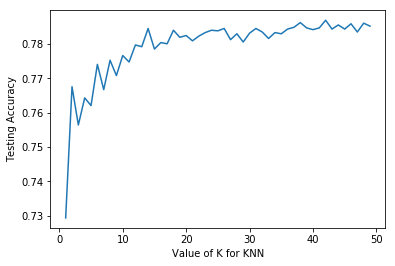

In [483]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


##### **Note **:  we have about a 81% accruracy for the Decision Tree model. Which is about the same as the decision tree but also better than the logistic regression

### 4. SVC

In [484]:
from sklearn.svm import LinearSVC
# create instance
svcmodel = LinearSVC(max_iter = 10000)
svcmodel.fit(x_train, y_train)
predictions = svcmodel.predict(x_test)
accuracy_score(y_test, predictions)

0.8061364415495372

##### **Note **:  We have about 80.6% accuracy rate which is a little better than our logistic regression but worse than our KNN and Decision Tree models.

### 5. Voting Classifier

In [485]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('lr', logmodel), ('dt', dtree), ('knn', knnmodel), ('suv', svcmodel)])
voting.fit(x_train, y_train)
predictions = voting.predict(x_test)
accuracy_score(y_test, predictions)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8114501199862872

##### **Note **:  We have about 81.1% accuracy rate which falls on the same weight as decision tree and KNN

### 6. Random Forrest 

In [488]:
from sklearn.ensemble import BaggingClassifier

In [489]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=None, random_state=None),
    n_estimators=1000, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [490]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=None, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.7725402811107303
0.7728830990743915


### 7. Ensemble with Decision Tree and KNN

In [491]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators = [('dt', dtree), ('knn', knnmodel)])
voting.fit(X_train, y_train)
predictions = voting.predict(X_test)
accuracy_score(y_test, predictions)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7754542338018512

In [492]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [493]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.792595131984916


In [494]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.7679122386013028


##### **Note **:  We have about 81.1% accuracy rate which falls on the same weight as decision tree, KNN and voting classifier

## Lets try one hot encoding

In [495]:
from sklearn.preprocessing import OneHotEncoder

In [496]:
X1 = df3[['education_num', 'workclass_cat', 'martial_status_cat', 'occuption_cat', 'relationship_cat', 'race_cat', 'sex_cat']].values

KeyError: "['workclass_cat' 'martial_status_cat'] not in index"

In [ ]:
ohe = OneHotEncoder()
X1 = ohe.fit_transform(X).toarray()
y = df3['income']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_numeric = encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y_numeric, test_size = 0.2, random_state = 42)

In [ ]:
# we do a get dummies inorder to replicate our 0-01 varaiables 
# but it wont show up in our data
pd.get_dummies(df3[['education_num', 'workclass_cat', 'martial_status_cat', 'occuption_cat', 'relationship_cat', 'race_cat', 'sex_cat']])

## One hot encoding done... I think?.. 

## NOTE: the df3 is the one we use have used to do the machiene learning, also used for the .cat.codes (label, encoder)

In [ ]:
## Now we are using df4 to do label encoding?

**NOTE: ** I used 7 features in my machiene learning models the 7 were the 
    categorical values that I eventually was able to use in my macheine learning
    models.
    
** X_features: ** education_num, workclass_cat martial_status_cat occuption_cat relationship_cat race_cat sex_cat

** Y_Features** Income- >50k = True (what we are interested in) <50k = False( not interested in)

## XGB Boost

**XGB** : We will now train and build a basic boosting classification model on our training data using the popular XGBoost framework, an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

### Making predictions on the test data

In [ ]:
import eli5
eli5.show_weights(clf)
eli5.show_weights(xgc.get_booster())

In [ ]:
doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], 
                     feature_names=list(data.columns),
                     show_feature_values=True)